In [2]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

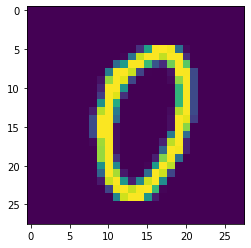

In [7]:
plt.imshow(X_train[1000])

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [9]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [13]:
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 114s 60ms/step - loss: 0.2560 - accuracy: 0.9482 - val_loss: 0.0892 - val_accuracy: 0.9705
Epoch 2/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0764 - accuracy: 0.9769 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 3/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0894 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.1006 - val_accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0982 - val_accuracy: 0.9749


In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.08561036735773087, 0.9794999957084656]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 104ms/step
[[1.38584610e-08 1.07322454e-14 4.29351721e-10 3.34827011e-09
  1.08443900e-14 2.62725497e-13 6.48456785e-18 1.00000000e+00
  3.87465476e-10 1.34119527e-09]
 [3.72541731e-09 1.17592826e-07 9.99999762e-01 2.09800088e-09
  1.00316207e-10 4.35526638e-15 1.21093521e-07 1.19548384e-14
  2.06270945e-10 1.99418277e-16]
 [2.62727031e-08 9.99396920e-01 4.03228296e-05 2.98111119e-11
  5.30134676e-05 7.22441200e-08 5.37898686e-08 3.38129780e-07
  5.09202364e-04 3.04239016e-08]
 [9.99999881e-01 1.81975680e-12 7.60477121e-08 1.94287769e-13
  2.70419017e-11 2.51674788e-12 4.56005400e-10 6.69914263e-11
  3.13835957e-10 1.41846410e-08]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
model.save('models/mnistCNN.h5')